<a href="https://colab.research.google.com/github/SaimNaveed646/Customer-Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
df = pd.read_excel("https://raw.githubusercontent.com/SaimNaveed646/Customer-Churn-Prediction/main/ECommerceDataset.xlsx")


In [12]:
# df = pd.read_excel('/content/drive/MyDrive/MissMahnoor/ECommerceDataset.xlsx')

# **Summary of a Dataset**
---
This dataset was collected from Kaggle and belongs to a leading e-commerce company. The goal of the dataset is to identify customers who are likely to churn so that the company can approach them with promotional offers and improve customer retention.

# **Column Description**


---



**CustomerID** -> Unique customer ID

**Churn**  -> Churn Flag

**Tenure** -> Tenure of customer in organization

**PreferredLoginDevice** ->  Preferred login device of customer

**CityTier** -> City tier

**WarehouseToHome** -> Distance in between warehouse to home of customer

**PreferredPaymentMode** -> Preferred payment method of customer

**Gender** -> Gender of customer

**HourSpendOnApp** -> Number of hours spend on mobile application or website

**NumberOfDeviceRegistered** -> Total number of deceives is registered on particular customer

**PreferedOrderCat** -> Preferred order category of customer in last month

**SatisfactionScore** -> Satisfactory score of customer on service

**MaritalStatus** -> Marital status of customer

**NumberOfAddress** -> Total number of added added on particular customer

**Complain** -> Any complaint has been raised in last month

**OrderAmountHikeFromlastYear** -> Percentage increases in order from last year

**CouponUsed** -> Total number of coupon has been used in last month

**OrderCount** -> Total number of orders has been places in last month

**DaySinceLastOrder** -> Day Since last order by customer

**CashbackAmount** -> Average cashback in last month

# **Issue with Dataset**


---



*   Tenure of many customer is not present `completion`
*   WarehouseToHome of many customer is not present `completion`
*   PreferredPaymentMode some in short form while some in full form
*   HourSpendOnApp of many customer is not present `completion`
*   PreferredOrderCategory has massy data like two or more catogory in same cells   `consistency`
*   OrderAmountHike , CouponUsed , OrderCount DaySince Last Order has miss data `completion`
*   Incorrect datatype asssign to Gender `validity`











In [13]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [14]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [15]:
df.sample(4)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1687,51688,0,4.0,Mobile Phone,1,13.0,Credit Card,Female,2.0,3,Fashion,1,Single,2,1,14.0,4.0,4.0,10.0,171.43
4202,54203,1,1.0,Phone,1,32.0,Debit Card,Male,3.0,6,Mobile Phone,3,Single,3,0,13.0,1.0,2.0,2.0,147.93
3147,53148,1,1.0,Computer,3,12.0,E wallet,Male,4.0,4,Mobile Phone,4,Single,3,1,15.0,2.0,2.0,1.0,143.78
5030,55031,0,9.0,Mobile Phone,3,24.0,Debit Card,Male,4.0,4,Laptop & Accessory,5,Married,5,1,16.0,1.0,2.0,NaN,214.66


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [17]:
df['CustomerID'].duplicated().sum()

np.int64(0)

In [18]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [19]:
copy_df = df.copy()

# **Cleaning**

The **Tenure** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [20]:
copy_df[copy_df['Tenure'].isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,52757,0,NaN,Phone,2,8.0,UPI,Female,2.0,3,Mobile,4,Married,5,0,14.0,0.0,1.0,2.0,121.87
2760,52761,0,NaN,Computer,1,7.0,CC,Male,2.0,4,Mobile,3,Married,2,0,12.0,0.0,1.0,0.0,120.08
2773,52774,0,NaN,Phone,3,7.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,2.0,2.0,2.0,122.69
2783,52784,1,NaN,Computer,3,15.0,E wallet,Male,2.0,3,Mobile Phone,5,Married,2,0,19.0,1.0,1.0,0.0,117.90


In [21]:
copy_df['Tenure'].median()


9.0

In [22]:
copy_df['Tenure'] = copy_df['Tenure'].fillna(copy_df['Tenure'].median())


The **WarehouseToHome** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [23]:
copy_df['WarehouseToHome'].median()


14.0

In [24]:
copy_df['WarehouseToHome'] = copy_df['WarehouseToHome'].fillna(copy_df['WarehouseToHome'].median())


The **HourSpendOnApp** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [25]:
copy_df['HourSpendOnApp'].median()

3.0

In [26]:
copy_df['HourSpendOnApp'] = copy_df['HourSpendOnApp'].fillna(copy_df['HourSpendOnApp'].median())

The **OrderAmountHikeFromlastYear** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [27]:
copy_df['OrderAmountHikeFromlastYear'].median()

15.0

In [28]:
copy_df['OrderAmountHikeFromlastYear'] = copy_df['OrderAmountHikeFromlastYear'].fillna(copy_df['OrderAmountHikeFromlastYear'].median())

The **CouponUsed** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [29]:
copy_df['CouponUsed'].median()

1.0

In [30]:
copy_df['CouponUsed'] = copy_df['CouponUsed'].fillna(copy_df['CouponUsed'].median())

The **OrderCount** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [31]:
copy_df['OrderCount'].median()

2.0

In [32]:
copy_df['OrderCount'] = copy_df['OrderCount'].fillna(copy_df['OrderCount'].median())

The **DaySinceLastOrder** column contained missing values. Since it is a numerical feature and can be affected by outliers, the missing values were filled using the median to maintain data consistency and improve model performance.

In [33]:
copy_df['DaySinceLastOrder'].median()

3.0

In [34]:
copy_df['DaySinceLastOrder'] = copy_df['DaySinceLastOrder'].fillna(copy_df['DaySinceLastOrder'].median())

In [35]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [36]:
copy_df['PreferredPaymentMode'].unique()


array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

The **PreferredPaymentMode** column contained inconsistent category labels (e.g., CC and Credit Card, COD and Cash on Delivery). These values were standardized to ensure consistency before encoding.

In [37]:
copy_df['PreferredPaymentMode'] = copy_df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery',
    'E wallet': 'E-Wallet',
    'UPI': 'Unified Payment '
})

In [38]:
copy_df['PreferredPaymentMode'].unique()

array(['Debit Card', 'Unified Payment ', 'Credit Card',
       'Cash on Delivery', 'E-Wallet'], dtype=object)

In [39]:
copy_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,Unified Payment,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


The PreferedOrderCat column contains inconsistent category labels due to spelling, case, or formatting differences. These were standardized to maintain consistency before encoding.

In [40]:
copy_df['PreferedOrderCat'] = copy_df['PreferedOrderCat'].str.lower().str.strip()

In [41]:
copy_df['PreferedOrderCat'] = copy_df['PreferedOrderCat'].replace({
    'laptop & accessory': 'LaptopAccessory',
    'mobile': 'Mobile',
    'mobile phone': 'Mobile',
    'fashion': 'Fashion',
    'grocery': 'Grocery'
})

In [42]:
copy_df['PreferedOrderCat'].unique()

array(['LaptopAccessory', 'Mobile', 'others', 'Fashion', 'Grocery'],
      dtype=object)

In [43]:
copy_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,LaptopAccessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,Unified Payment,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,LaptopAccessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,LaptopAccessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,LaptopAccessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,LaptopAccessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# **Feature Engineering**

In [44]:
copy_df[copy_df['OrderCount'] == 0 ]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [45]:
copy_df['AverageOrderValue'] = copy_df['CashbackAmount'] / copy_df['OrderCount']

In [46]:
copy_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,AverageOrderValue
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,159.93
1,50002,1,9.0,Phone,1,8.0,Unified Payment,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,129.60


--> AvgCashbackPerOrder represents the average cashback received per order by a customer. Customers with higher values and higher order counts are likely more loyal and engaged, while those with lower values may be less active or at risk of churning

# **Transform**



-->The Gender column, originally categorical, was encoded as integers (Male=1, Female=0) to make it suitable for reducing space

In [47]:
copy_df['Gender'] = copy_df['Gender'].map({'Male': 1, 'Female': 0})

In [48]:
copy_df['Gender'].unique()

array([0, 1])

--> Same for Marital Status

In [49]:
copy_df['MaritalStatus'] = copy_df['MaritalStatus'].map({'Single': 0, 'Married': 1,'Divorced':2})


In [50]:
copy_df['MaritalStatus'].unique()

array([0, 2, 1])

# **EDA**

Numerical - CustomerID,Tenure,WarehouseToHome,	HourSpendOnApp,	NumberOfDeviceRegistered ,SatisfactionScore , NumberOfAddress	Complain	OrderAmountHikeFromlastYear , CouponUsed , 	OrderCount	DaySinceLastOrder ,	CashbackAmount

Catogory  - Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode ,Gender , PreferedOrderCat , MaritalStatus

**Univariate analysis on Numerical Data**

**Tenure**

In [51]:
copy_df['Tenure'].describe()

,Tenure
count,5630.000000
mean,10.134103
std,8.357951
min,0.000000
25%,3.000000
50%,9.000000
75%,15.000000
max,61.000000


<Axes: ylabel='Frequency'>

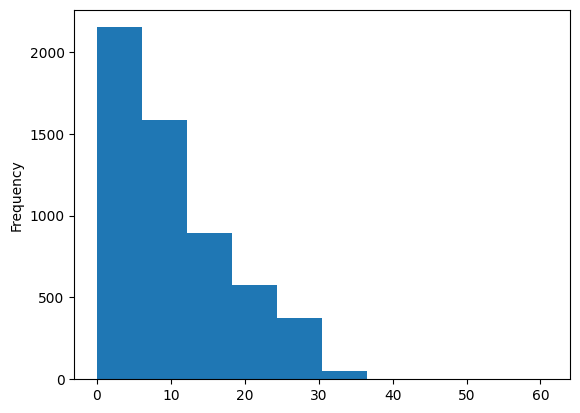

In [52]:
copy_df['Tenure'].plot(kind='hist')

<Axes: ylabel='Density'>

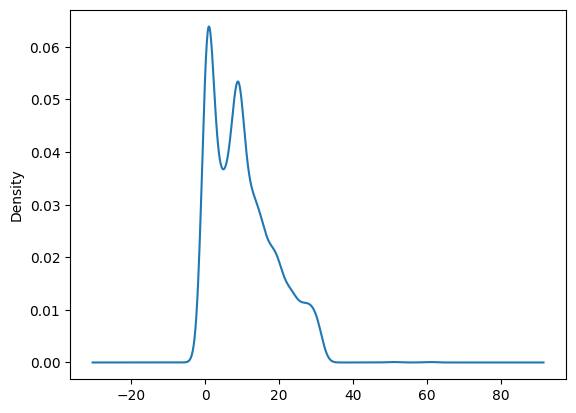

In [53]:
copy_df['Tenure'].plot(kind='kde')

In [54]:
copy_df['Tenure'].skew()

np.float64(0.7732782369506156)

<Axes: >

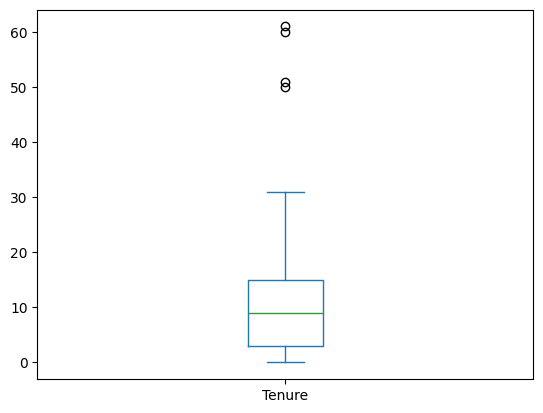

In [55]:
copy_df['Tenure'].plot(kind='box')

In [56]:
copy_df[copy_df['Tenure']>=50]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,AverageOrderValue
928,50929,0,50.0,Phone,1,6.0,Debit Card,1,3.0,1,...,3,2,1,0,24.0,1.0,2.0,8.0,149.00,74.500
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,0,3.0,3,...,1,1,5,1,13.0,1.0,1.0,0.0,278.75,278.750
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,1,4.0,2,...,3,2,2,0,25.0,2.0,3.0,9.0,174.00,58.000
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,0,4.0,4,...,1,1,6,1,15.0,1.0,2.0,1.0,303.75,151.875


-->Most customers have values in the low to moderate range; however, a few extreme customers (4 outliers) extend the distribution to the right. The feature is moderately right-skewed, indicating that the majority of customers fall on the lower end, while a small number of high-end users represent special cases

-->A large number of customers have recently joined, indicating a higher potential churn risk. Business insight: New customers may require loyalty programs and engagement strategies to retain them

**HourSpendOnApp**

In [57]:
copy_df['HourSpendOnApp'].describe()

,HourSpendOnApp
count,5630.000000
mean,2.934636
std,0.705528
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


<Axes: ylabel='Frequency'>

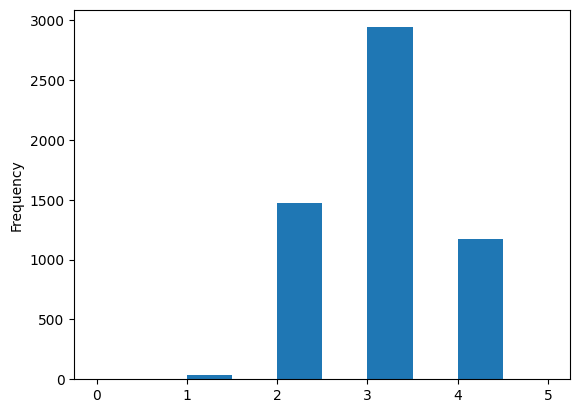

In [58]:
copy_df['HourSpendOnApp'].plot(kind='hist')

<Axes: ylabel='Density'>

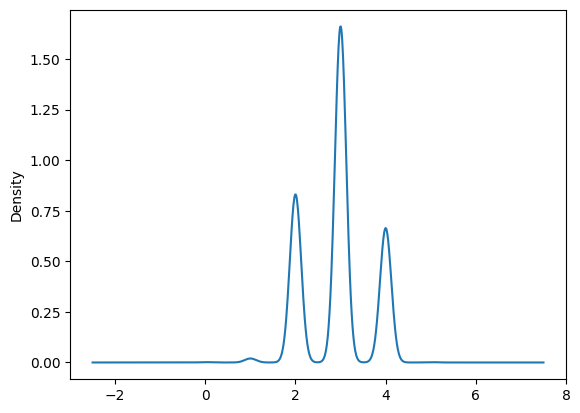

In [59]:
copy_df['HourSpendOnApp'].plot(kind='kde')

In [60]:
copy_df['HourSpendOnApp'].skew()

np.float64(-0.0409824947247031)

<Axes: >

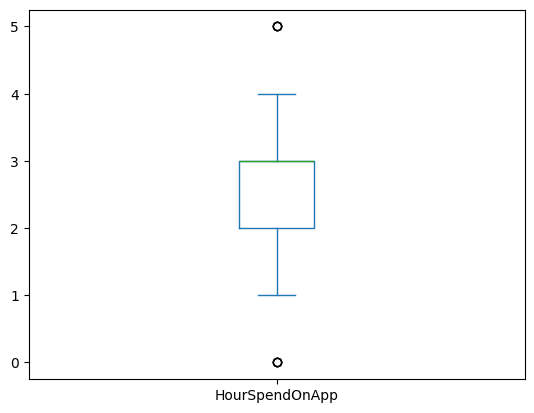

In [61]:
copy_df['HourSpendOnApp'].plot(kind='box')

-->HourSpendOnApp shows approximately symmetric distribution with negligible negative skewness (−0.0409), indicating near-normal behavior.

-->If low-engagement users are more likely to churn, targeted notifications and personalized marketing campaigns can be used to re-engage them and reduce churn

 **Satisfaction score**

In [62]:
copy_df['SatisfactionScore'].describe()

,SatisfactionScore
count,5630.000000
mean,3.066785
std,1.380194
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


<Axes: ylabel='Frequency'>

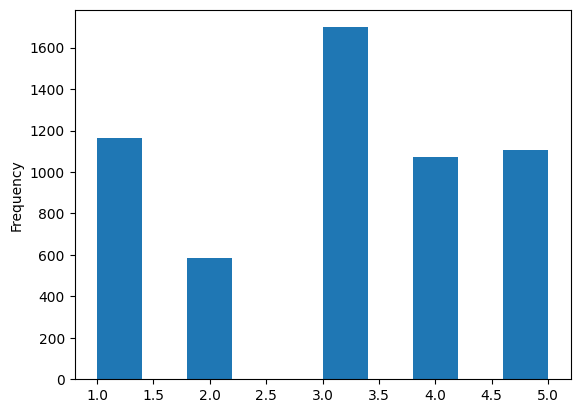

In [63]:
copy_df['SatisfactionScore'].plot(kind='hist')

<Axes: ylabel='Density'>

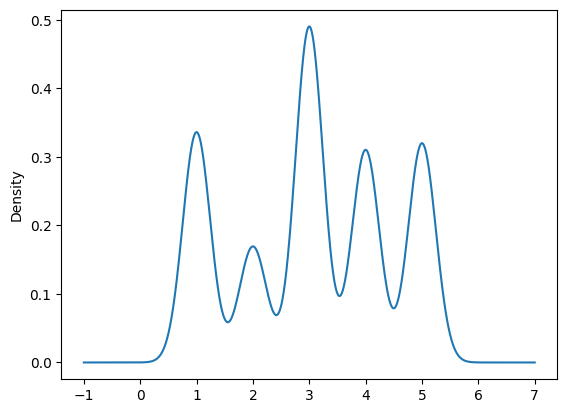

In [64]:
copy_df['SatisfactionScore'].plot(kind='kde')

In [65]:
copy_df['SatisfactionScore'].skew()

np.float64(-0.1426257223091171)

<Axes: >

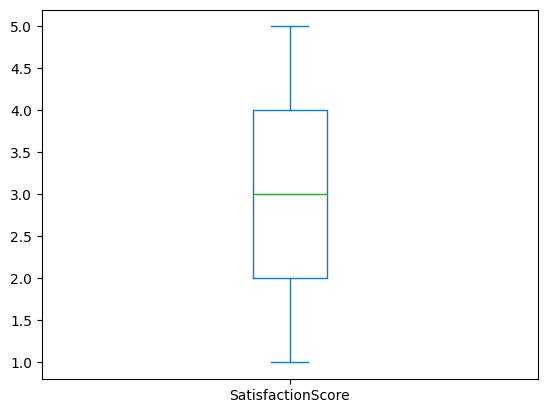

In [66]:
copy_df['SatisfactionScore'].plot(kind='box')

-->The skewness of SatisfactionScore is -0.14, indicating that the distribution is approximately symmetric with a slight left skew

The majority of customers have medium satisfaction levels. Business insight: Strategies can be developed to retain these average customers.

**Univarite analysis on Category Data**

**Churn**

In [67]:
copy_df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


<Axes: xlabel='Churn'>

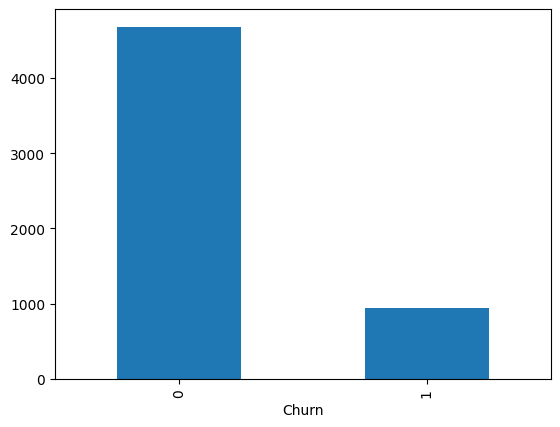

In [68]:
copy_df['Churn'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

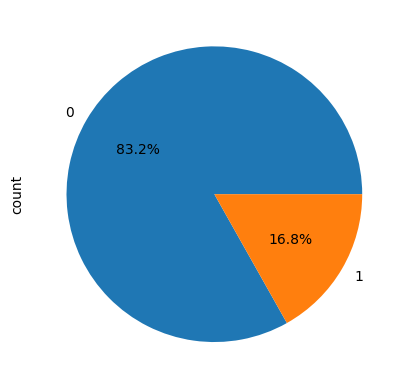

In [69]:
copy_df['Churn'].value_counts().plot(kind='pie' , autopct = '%0.1f%%')

**Gender**

In [70]:
copy_df['Gender'].value_counts()

,count
Gender,
1,3384
0,2246


<Axes: xlabel='Gender'>

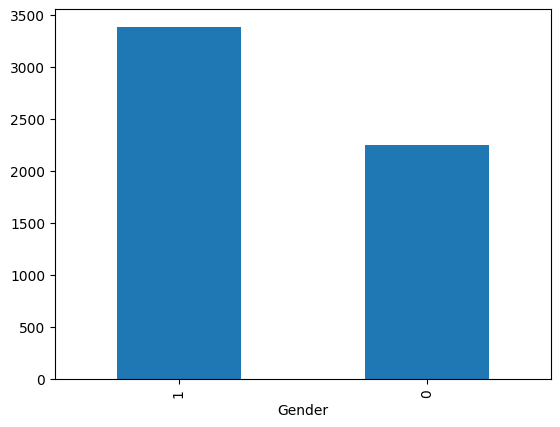

In [71]:
copy_df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

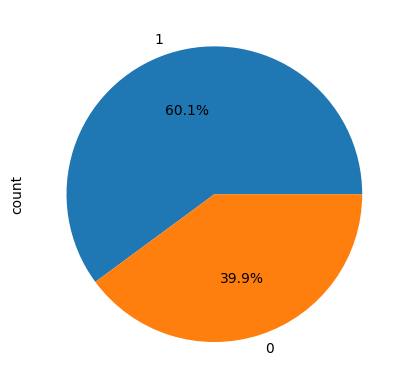

In [72]:
copy_df['Gender'].value_counts().plot(kind='pie' , autopct = '%0.1f%%')

**MaritalStatus**

In [73]:
copy_df['MaritalStatus'].value_counts()

,count
MaritalStatus,
1,2986
0,1796
2,848


<Axes: xlabel='MaritalStatus'>

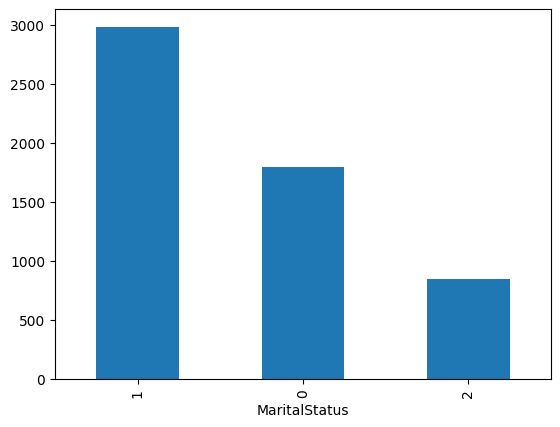

In [74]:
copy_df['MaritalStatus'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

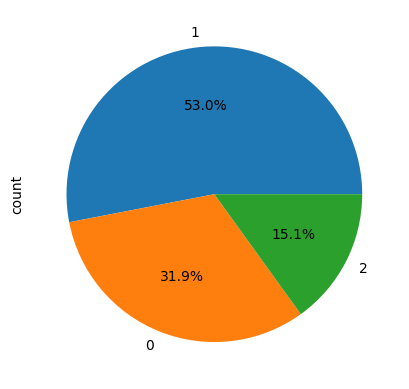

In [75]:
copy_df['MaritalStatus'].value_counts().plot(kind='pie' , autopct = '%0.1f%%')

**Bivariate Analysis on Catogorical and Catogorical Data**

In [76]:
# 1 -> Male
# 0 -> Female
# 0 -> Not Churn
# 1 -> Churn

In [77]:
pd.crosstab(copy_df['Churn'],copy_df['Gender'],normalize='columns')*100

Gender,0,1
Churn,,
0,84.505788,82.269504
1,15.494212,17.730496


<Axes: xlabel='Gender', ylabel='Churn'>

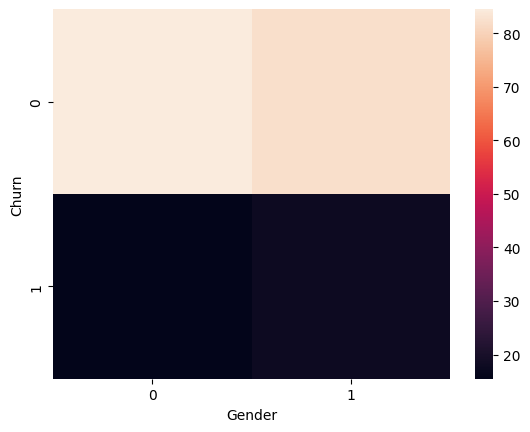

In [78]:
sns.heatmap(pd.crosstab(copy_df['Churn'],copy_df['Gender'],normalize='columns')*100)

--> Gender doesnot appear to be a strong predictor of churn as both catogories exhibit comparable churn rates

In [79]:
pd.crosstab(copy_df['Churn'],copy_df['MaritalStatus'],normalize='columns')*100

MaritalStatus,0,1,2
Churn,,,
0,73.273942,88.479571,85.377358
1,26.726058,11.520429,14.622642


<Axes: xlabel='MaritalStatus', ylabel='Churn'>

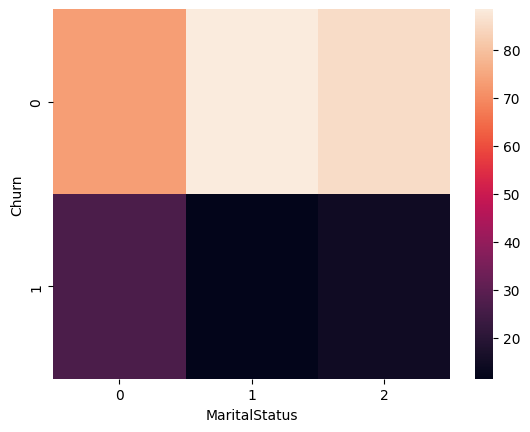

In [80]:
sns.heatmap(pd.crosstab(copy_df['Churn'],copy_df['MaritalStatus'],normalize='columns')*100)

--> Single customers show a significantly higher churn rate compared to married and divorced customers. Married customers are the most stable group with the lowest churn rate. This suggests that marital status has a noticeable impact on customer churn, particularly for single customers.

**Bivariant Analysis on  Numerical and Categorical Data**

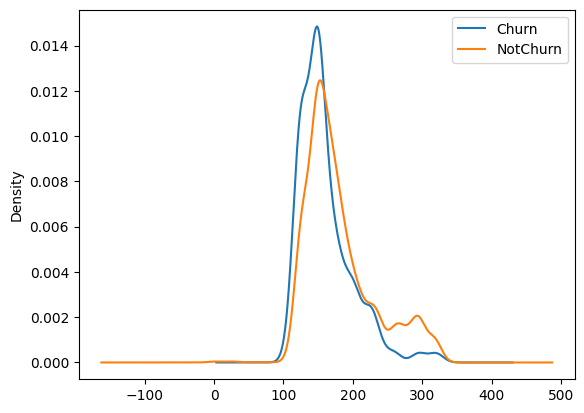

In [81]:
copy_df[copy_df['Churn'] == 1]['CashbackAmount'].plot(kind='kde',label='Churn')
copy_df[copy_df['Churn'] == 0]['CashbackAmount'].plot(kind='kde',label='NotChurn')

plt.legend()
plt.show()

--> The analysis indicate that higher cashback amounts are associated with lower customer churn, suggesting that cashback incentives can help improve customer retention



---



# **Conclusion**

The EDA of the dataset revealed key insights into customer behavior. Numerical features like Tenure, Satisfaction Score,  HourSpendOnApp, and showed skewed distributions with some outliers, highlighting variations in customer activity. Categorical features such as Gender and Marital Status indicated differences in churn rates, with single customers and low cashback recipients being more likely to churn. Overall, these analyses help identify the most important features affecting customer churn and provide actionable insights for retention strategies.